In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

DESCRIBE_PERCENTILES = [0.9, 0.95, 0.975, 0.99]

In [2]:
mcu = pd.read_csv("./data/mcu.csv")
movies = pd.read_csv("./data/movies.csv")
characters = pd.read_csv("./data/characters.csv")

# Movies

In [3]:
movies

,movie,is transcript,lines,runtime min,url,words,year,characters
0,Iron Man,False,834,126,https://www.scriptslug.com/assets/uploads/scripts/iron-man-2008.pdf,10004,2008,37
1,Iron Man 2,True,1010,124,https://transcripts.fandom.com/wiki/Iron_Man_2,11342,2010,42
2,Thor,False,1007,114,https://www.scriptslug.com/assets/uploads/scripts/thor-2011.pdf,9299,2011,39
3,Captain America: The First Avenger,True,688,124,https://transcripts.fandom.com/wiki/Captain_America:_The_First_Avenger,7482,2011,70
4,The Avengers,False,1027,143,https://www.scriptslug.com/assets/uploads/scripts/the-avengers-2012.pdf,10643,2012,54
5,Iron Man 3,True,1043,131,https://transcripts.fandom.com/wiki/Iron_Man_3,10875,2013,57
6,Thor: The Dark World,True,734,112,https://transcripts.fandom.com/wiki/Thor:_The_Dark_World,7418,2013,41
7,Captain America: The Winter Soldier,True,841,136,https://transcripts.fandom.com/wiki/Captain_America:_The_Winter_Soldier,8696,2014,65
8,Ant-Man,True,867,117,https://transcripts.fandom.com/wiki/Ant-Man,9335,2015,33
9,Avengers: Age of Ultron,True,980,141,https://transcripts.fandom.com/wiki/Avengers:_Age_of_Ultron,10405,2015,38


In [4]:
profile = ProfileReport(movies, title="Movies", progress_bar=False)
   
profile
profile.to_widgets()

In [5]:
movies.describe(percentiles = DESCRIBE_PERCENTILES)

,lines,runtime min,words,year,characters
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,964.333333,133.500000,9619.555556,2014.611111,49.777778
std,197.436513,15.912444,1511.684577,3.292396,14.293378
min,688.000000,112.000000,7137.000000,2008.000000,33.000000
50%,983.500000,132.000000,9649.500000,2015.000000,46.500000
90%,1098.800000,147.600000,11442.500000,2018.300000,70.000000
95%,1278.350000,153.800000,11757.550000,2019.000000,71.800000
97.5%,1418.175000,167.400000,11985.775000,2019.000000,76.900000
99%,1502.070000,175.560000,12122.710000,2019.000000,79.960000
max,1558.000000,181.000000,12214.000000,2019.000000,82.000000


In [6]:
movies.corr(method="pearson")

,is transcript,lines,runtime min,words,year,characters
is transcript,1.000000,-0.079983,-0.224765,-0.101240,0.009894,0.200545
lines,-0.079983,1.000000,0.447997,0.835425,0.281009,0.456832
runtime min,-0.224765,0.447997,1.000000,0.470156,0.500207,0.408894
words,-0.101240,0.835425,0.470156,1.000000,-0.055007,0.230410
year,0.009894,0.281009,0.500207,-0.055007,1.000000,0.178053
characters,0.200545,0.456832,0.408894,0.230410,0.178053,1.000000


# Dialogue

### Words per line

,words
count,17358.000000
mean,9.975343
std,11.738537
min,1.000000
50%,7.000000
90%,21.000000
95%,29.000000
97.5%,38.075000
99%,56.000000
max,251.000000


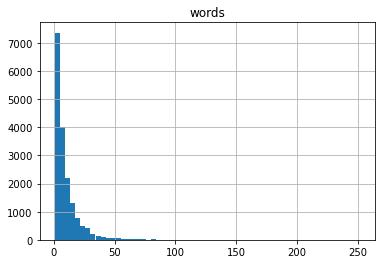

In [7]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe(percentiles = DESCRIBE_PERCENTILES)

# Characters

In [8]:
characters

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,179,163,128,0,176,0,0,0,...,88,170,0,0,0,1976,22603,9,11,219
1,STEVE ROGERS,3,137,131,25,0,163,188,224,3,...,11,127,0,0,0,1024,8653,10,8,102
2,THOR,0,56,76,77,0,0,0,0,0,...,0,47,192,343,134,959,9487,7,9,137
3,PETER PARKER,0,0,9,46,0,73,0,0,0,...,529,0,0,0,0,700,5517,4,7,175
4,NATASHA ROMANOFF,1,81,74,15,0,68,0,116,3,...,0,101,0,3,0,519,4689,10,9,51
5,PEPPER POTTS,0,0,16,21,0,0,0,0,0,...,7,30,0,0,0,459,3479,7,7,65
6,NICK FURY,0,26,0,8,0,0,5,75,132,...,0,121,0,0,0,399,4524,7,11,57
7,BRUCE BANNER,0,83,103,49,0,0,0,0,2,...,0,86,0,66,0,399,3840,7,9,57
8,LOKI,0,0,1,7,0,0,0,0,0,...,0,74,117,88,78,377,4097,6,10,62
9,SCOTT LANG,244,0,80,0,0,22,0,0,0,...,0,0,0,0,0,357,3236,3,9,119


In [9]:
profile = ProfileReport(characters, title="Characters", progress_bar=False)
   
profile
profile.to_widgets()

In [10]:
characters.describe(percentiles = DESCRIBE_PERCENTILES)

,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Guardians of the Galaxy Vol. 2,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,...,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,1.300613,1.501534,1.865031,1.504601,1.273006,1.501534,1.052147,1.266871,1.170245,1.481595,...,2.294479,1.569018,1.530675,1.441718,1.046012,26.622699,265.570552,1.374233,8.780675,10.898773
std,12.631191,11.307121,11.525709,8.932327,9.400249,11.147317,8.942230,11.089052,11.366949,12.924618,...,22.837214,11.805899,12.190147,15.011250,8.512268,111.161824,1156.073697,1.168380,9.128006,22.041342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,22.000000,1.000000,7.000000,3.000000
90%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,59.900000,620.700000,2.000000,16.000000,28.000000
95%,0.450000,1.000000,4.000000,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,...,4.000000,1.450000,1.000000,1.000000,1.450000,105.250000,1183.150000,3.000000,20.000000,57.000000
97.5%,3.000000,12.725000,18.175000,17.000000,7.175000,11.725000,5.725000,6.450000,4.725000,3.000000,...,11.000000,9.175000,5.725000,7.175000,3.725000,197.000000,2046.075000,5.000000,26.000000,77.725000
99%,30.960000,46.310000,55.940000,47.490000,37.800000,37.940000,27.430000,22.490000,18.490000,47.900000,...,50.250000,48.470000,49.900000,35.410000,23.490000,399.000000,3965.930000,7.000000,49.390000,103.490000
max,244.000000,179.000000,163.000000,128.000000,151.000000,176.000000,188.000000,224.000000,226.000000,210.000000,...,529.000000,170.000000,192.000000,343.000000,134.000000,1976.000000,22603.000000,11.000000,115.000000,219.000000


### Correlation Between Avg Words Per Line and Line Count

I wonder if there's a noticeable correlation between a character's `avg words per line` and their number of `total lines`.  
**In other words, do characters with more lines have longer lines?**

Let's start by inspecting the correlation between our useful features.  Some of these will be highly correlated because they are calculated using each other.

In [11]:
characters[["total lines", "total words", "avg words per line", "movie appearances", "avg lines per movie"]].corr(method="pearson")

,total lines,total words,avg words per line,movie appearances,avg lines per movie
total lines,1.000000,0.986673,0.017691,0.671427,0.756541
total words,0.986673,1.000000,0.049712,0.633074,0.745319
avg words per line,0.017691,0.049712,1.000000,0.005259,0.059037
movie appearances,0.671427,0.633074,0.005259,1.000000,0.445971
avg lines per movie,0.756541,0.745319,0.059037,0.445971,1.000000


Now let's create a regression model using `total lines` and `avg words per line`.

(0.0, 20.0)

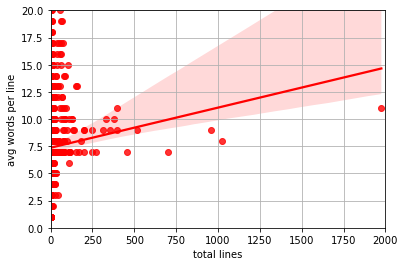

In [22]:
plt.grid()
sns.regplot(x = characters['total lines'].to_numpy(), 
            y = characters['avg words per line'].to_numpy(), 
            color='r', robust = True)
plt.xlabel('total lines')
plt.ylabel('avg words per line')
plt.xlim(0,2000)
plt.ylim(0,20)

In [12]:
regression_model = smf.ols('characters["avg words per line"] ~ characters["total lines"]', data=characters).fit()

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     characters["avg words per line"]   R-squared:                       0.000
Model:                                          OLS   Adj. R-squared:                 -0.001
Method:                               Least Squares   F-statistic:                    0.2035
Date:                              Sun, 03 Jan 2021   Prob (F-statistic):              0.652
Time:                                      19:41:38   Log-Likelihood:                -2366.3
No. Observations:                               652   AIC:                             4737.
Df Residuals:                                   650   BIC:                             4746.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.7420      0.368     23.766      0.000       8.020       9.464
characters["total lines"]     0.0015      0.003      0.451      0.652      -0.005       0.008
==============================================================================
Omnibus:                      749.011   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58722.836
Skew:                           5.517   Prob(JB):                         0.00
Kurtosis:                      48.164   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a t test and a confidence level of 95% ($\alpha=0.05$), we **fail to reject** the null hypothesis that there is no relationship between the number of lines a character has and the average length of their lines.

In other words, there is no evidence that having more lines means a character will have longer lines.

# Subsetting the Dataset

### Subsetting examples by character

In [13]:
percentile = 0.95
line_threshold = characters.quantile(percentile, axis=0)['total lines']
word_threshold = characters.quantile(percentile, axis=0)['total words']
appearance_threshold = characters.quantile(percentile, axis=0)['movie appearances']

top_characters_by_line = characters['total lines'] > line_threshold
top_characters_by_word = characters['total words'] > word_threshold
top_characters_by_appearance = characters['movie appearances'] > appearance_threshold

print("Top", round((1-percentile)*100,2),"% of characters by line:\n",characters[top_characters_by_line]['character'].to_numpy(),"\n")
print("Top", round((1-percentile)*100,2),"% of characters by words:\n",characters[top_characters_by_word]['character'].to_numpy(),"\n")
print("Top", round((1-percentile)*100,2),"% of characters by appearances:\n",characters[top_characters_by_appearance]['character'].to_numpy(),"\n")

print("")

print("Top", round((1-percentile)*100,2),"% of characters by line, words, and appearances:\n",characters[top_characters_by_line & top_characters_by_word & top_characters_by_appearance]['character'].to_numpy())

Top 5.0 % of characters by line:
 ['TONY STARK' 'STEVE ROGERS' 'THOR' 'PETER PARKER' 'NATASHA ROMANOFF'
 'PEPPER POTTS' 'NICK FURY' 'BRUCE BANNER' 'LOKI' 'SCOTT LANG'
 'JAMES RHODES' 'PETER QUILL' 'JANE FOSTER' 'CAROL DANVERS' 'ROCKET'
 "T'CHALLA" 'CLINT BARTON' 'GAMORA' 'SAM WILSON' 'HAPPY HOGAN' 'ODIN'
 'HANK PYM' 'NED LEEDS' 'JARVIS' 'PHIL COULSON' 'ERIK SELVIG' 'THANOS'
 'DRAX' 'BUCKY BARNES' 'ADRIAN TOOMES' 'SHURI' 'DARCY LEWIS'
 'WANDA MAXIMOFF'] 

Top 5.0 % of characters by words:
 ['TONY STARK' 'STEVE ROGERS' 'THOR' 'PETER PARKER' 'NATASHA ROMANOFF'
 'PEPPER POTTS' 'NICK FURY' 'BRUCE BANNER' 'LOKI' 'SCOTT LANG'
 'JAMES RHODES' 'PETER QUILL' 'JANE FOSTER' 'CAROL DANVERS' 'ROCKET'
 "T'CHALLA" 'CLINT BARTON' 'GAMORA' 'SAM WILSON' 'HAPPY HOGAN' 'ODIN'
 'HANK PYM' 'JARVIS' 'PHIL COULSON' 'ERIK SELVIG' 'THANOS' 'EGO' 'LUIS'
 'JUSTIN HAMMER' 'ULTRON' 'OBADIAH STANE' 'ALDRICH KILLIAN'
 'ALEXANDER PIERCE'] 

Top 5.0 % of characters by appearances:
 ['TONY STARK' 'STEVE ROGERS' 'THOR' 'P

In [14]:
main_characters = ['TONY STARK', 'THOR', 'STEVE ROGERS', 'BRUCE BANNER', 'PETER QUILL', 'ROCKET', 'NATASHA ROMANOFF', 
                   'PEPPER POTTS', 'LOKI']

mcu_subset = mcu[mcu['character'].isin(main_characters)]

mcu_subset.to_csv("./data/mcu_subset.csv")

### Subsetting examples by number of words

We might want to threshold these examples at a given number of words because it's hard to predict who said what line when the line only has few words.  The cell below provides a variable `threshold` and a table that shows how many examples are above / below the threshold number of words for each character.  The table also shows the total number of words spoken by a character in the dataset.

In [15]:
threshold = 10

above_threshold = mcu["words"] >= threshold

mcu_high_word_count = mcu[above_threshold]
mcu_low_word_count = mcu[~above_threshold]

high_word_line_count = pd.DataFrame(mcu_high_word_count.groupby("character").line.nunique())
low_word_line_count = pd.DataFrame(mcu_low_word_count.groupby("character").line.nunique())

word_count_table = high_word_line_count.join(low_word_line_count, how='outer', lsuffix=' high word count', 
                                             rsuffix=' low word count')
word_count_table.fillna(0, inplace=True)
word_count_table.columns = ["lines above threshold", "lines below threshold"]
word_count_table['total lines'] = word_count_table.sum(axis=1)
#word_count_table['% lines above threshold'] = word_count_table['lines above threshold'] / word_count_table['total lines']
#word_count_table['% lines below threshold'] = word_count_table['lines below threshold'] / word_count_table['total lines']
word_count_table = word_count_table.astype({'lines above threshold': "int64", 
                                            'lines below threshold': "int64",
                                            'total lines': "int64"})
word_count_table['total words'] = mcu.groupby(by="character").sum()['words']
word_count_table['avg words per line'] = word_count_table['total words'] / word_count_table['total lines']

word_count_table.sort_values(by='total words', inplace=True, ascending=False)

word_count_table

,lines above threshold,lines below threshold,total lines,total words,avg words per line
character,,,,,
TONY STARK,809,1113,1922,22603,11.760146
THOR,323,587,910,9487,10.425275
STEVE ROGERS,268,725,993,8653,8.713998
PETER PARKER,200,451,651,5517,8.474654
NATASHA ROMANOFF,166,348,514,4689,9.122568
NICK FURY,170,222,392,4524,11.540816
LOKI,152,210,362,4097,11.317680
BRUCE BANNER,143,246,389,3840,9.871465
JAMES RHODES,138,186,324,3486,10.759259


In [16]:
word_count_table.describe(percentiles = DESCRIBE_PERCENTILES)

,lines above threshold,lines below threshold,total lines,total words,avg words per line
count,652.000000,652.000000,652.000000,652.000000,652.000000
mean,9.147239,16.832822,25.980061,265.570552,9.141394
std,40.768800,67.874566,107.624859,1156.073697,9.134779
min,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,22.000000,7.400000
90%,20.000000,33.800000,59.900000,620.700000,16.000000
95%,38.000000,69.250000,103.000000,1183.150000,20.112500
97.5%,62.725000,134.725000,194.450000,2046.075000,26.362500
99%,147.410000,237.330000,390.470000,3965.930000,49.645000
max,809.000000,1113.000000,1922.000000,22603.000000,115.000000
